In [1]:
] activate .

In [2]:
include("../src/StableDQMC.jl")
using .StableDQMC

In [3]:
using GenericSVD, JacobiSVD, LinearAlgebra, Plots, Statistics

pyplot();
PyPlot.plt.style.use("publication_tex")
default(
    framestyle = :grid,
    grid = true,
    guidefont=font(15),
#     framestyle = :box,
#     grid = false,
#     guidefont=font(18),
    legend = true,
    size = (1.6*360, 360),
    xtickfont=font(13), 
    ytickfont=font(13), 
    legendfont=font(12),
    linewidth = 1.5
);

# default(
#     framestyle = :box,
#     legend = true,
#     grid = false,
#     size = (1.5*250, 250),
#     xtickfont=font(8), 
#     ytickfont=font(8), 
#     guidefont=font(11),
#     legendfont=font(8),
#     linewidth = 1
# );

In [4]:
# Some basic tests
B = rand(5,5) # regular matrix
N = 10
@assert isapprox(StableDQMC.calc_product_chain(B, N)[1], B^N)
@assert isapprox(UDV_to_mat(StableDQMC.calc_product_chain_stabilized(B, N, gesdd)[1:3]...), B^N)
@assert isapprox(UDV_to_mat(StableDQMC.calc_product_chain_stabilized(B, N, gesvd)[1:3]...), B^N)
@assert isapprox(UDV_to_mat(StableDQMC.calc_product_chain_stabilized(B, N, genericsvd)[1:3]...), B^N)
@assert isapprox(UDT_to_mat(StableDQMC.calc_product_chain_stabilized(B, N, decompose_udt)[1:3]...), B^N)
# @assert isapprox(StableDQMC.calc_product_chain_stabilized(B, N, gesvj)[1], B^N)

┌ Warning: UDT_to_mat! probably shouldn't be called here
└ @ Main.StableDQMC C:\Users\carsten\Desktop\sciebo\projects\sdw-qcp\notes\stabilization\StableDQMC\src\qr.jl:532


# B from spin-fermion model

In [281]:
B = [0.975173 0.0971936 0.192475 0.0191836 0.0 0.0 0.0 0.0; 0.0971936 0.975173 0.0191836 0.192475 0.0 0.0 0.0 0.0; 0.192475 0.0191836 0.975173 0.0971936 0.0 0.0 0.0 0.0; 0.0191836 0.192475 0.0971936 0.975173 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.975173 -0.192475 -0.0971936 0.0191836; 0.0 0.0 0.0 0.0 -0.192475 0.975173 0.0191836 -0.0971936; 0.0 0.0 0.0 0.0 -0.0971936 0.0191836 0.975173 -0.192475; 0.0 0.0 0.0 0.0 0.0191836 -0.0971936 -0.192475 0.975173]

8×8 Array{Float64,2}:
 0.975173   0.0971936  0.192475   …   0.0         0.0         0.0      
 0.0971936  0.975173   0.0191836      0.0         0.0         0.0      
 0.192475   0.0191836  0.975173       0.0         0.0         0.0      
 0.0191836  0.192475   0.0971936      0.0         0.0         0.0      
 0.0        0.0        0.0           -0.192475   -0.0971936   0.0191836
 0.0        0.0        0.0        …   0.975173    0.0191836  -0.0971936
 0.0        0.0        0.0            0.0191836   0.975173   -0.192475 
 0.0        0.0        0.0           -0.0971936  -0.192475    0.975173 

In [11]:
# Bbig = BigFloat.(B)
# N = 400

# setprecision(100) do
#     global svs_genericsvd = StableDQMC.calc_product_chain_stabilized(Bbig, N, genericsvd)[4];
# end
# svs_qr_udt = StableDQMC.calc_product_chain_stabilized(B, N, decompose_udt)[4];
# svs_gesvd = StableDQMC.calc_product_chain_stabilized(B, N, gesvd)[4];
# svs_gesdd = StableDQMC.calc_product_chain_stabilized(B, N, gesdd)[4];
# svs_gesvj = StableDQMC.calc_product_chain_stabilized(B, N, gesvj)[4];

In [12]:
# plot(svs_genericsvd, color="#CA0020", labels = reshape(["exact", "", "","", "","", "", ""], (1,8)))
# plot!(svs_qr_udt, color="#E66101", labels = reshape(["QR", "", "","", "","", "", ""], (1,8)))
# plot!(svs_gesvj, color="#FDB863", labels = reshape(["SVD (Jacobi)", "", "","", "","", "", ""], (1,8)))
# plot!(svs_gesvd, color="#008837", labels = reshape(["SVD", "", "","", "","", "", ""], (1,8)))
# plot!(svs_gesdd, color="#5E3C99", labels = reshape(["SVD (D\\&C)", "", "","", "","", "", ""], (1,8)))

# ylabel!("log singular values")
# xlabel!("length of product chain")
# ylims!(-150, 85)
# xlims!((0., 290.))
# savefig("decomp_comparison.pdf")

# Non-interacting system

In [5]:
n = 8
t = -1
μ = -0.1
Δτ = 0.1
T = diagm(-1 => fill(-t, n-1), 1 => fill(-t, n-1), 0 => fill(μ, n))

# PBC
T[1,end] = -t
T[end,1] = -t

B = exp(-Δτ .* T)

8×8 Array{Float64,2}:
  1.02018      -0.101511      0.00506711   …   0.00506711   -0.101511   
 -0.101511      1.02018      -0.101511        -0.000168847   0.00506711 
  0.00506711   -0.101511      1.02018          8.43393e-6   -0.000168847
 -0.000168847   0.00506711   -0.101511        -0.000168847   8.43393e-6 
  8.43393e-6   -0.000168847   0.00506711       0.00506711   -0.000168847
 -0.000168847   8.43393e-6   -0.000168847  …  -0.101511      0.00506711 
  0.00506711   -0.000168847   8.43393e-6       1.02018      -0.101511   
 -0.101511      0.00506711   -0.000168847     -0.101511      1.02018    

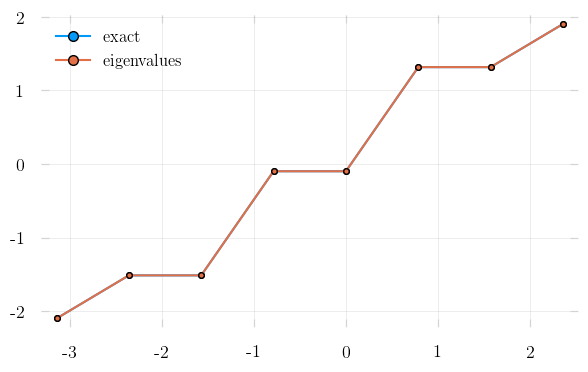

In [37]:
# Compare to exact discretized energies
ks = LinRange(-pi, pi, n+1)[1:end-1]
ϵ(k) = -2*t*cos(k) + μ
sort(ϵ.(ks))

plot(ks, sort(ϵ.(ks)), marker=:dot, label="exact")
plot!(ks, eigvals(T), marker=:dot, label="eigenvalues")

In [7]:
function LinearAlgebra.cond(svs::AbstractVector)
    mi, ma = extrema(svs)
    ma / mi
end

In [8]:
cond(B)

1.4918246976412697

In [9]:
kappa(N) = exp(4abs(t)*N*Δτ)

kappa (generic function with 1 method)

In [10]:
cond(B)

1.4918246976412697

In [11]:
kappa(1)

1.4918246976412703

In [12]:
estimate_breakdown(sigdigits) = sigdigits * log(10) / (4 * abs(t) * Δτ)

estimate_breakdown (generic function with 1 method)

In [13]:
estimate_breakdown(17)

97.85986645224693

In [14]:
Bbig = BigFloat.(B)
N = 500

setprecision(100) do
    global svs_genericsvd = StableDQMC.calc_product_chain_stabilized(Bbig, N, genericsvd)[4];
end
svs_qr_udt = StableDQMC.calc_product_chain_stabilized(B, N, decompose_udt)[4];
svs_gesvd = StableDQMC.calc_product_chain_stabilized(B, N, gesvd)[4];
svs_gesdd = StableDQMC.calc_product_chain_stabilized(B, N, gesdd)[4];
svs_gesvj = StableDQMC.calc_product_chain_stabilized(B, N, gesvj)[4];

In [15]:
cond(exp.(svs_qr_udt[end,:]))

9.032467210156366e85

In [16]:
kappa(N)

7.225973768125749e86

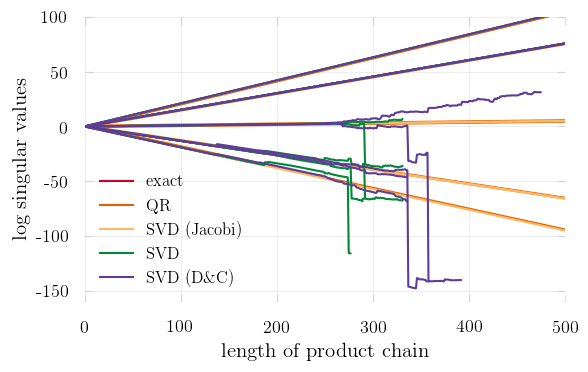

In [17]:
plot(svs_genericsvd, color="#CA0020", labels = reshape(["exact", "", "","", "","", "", ""], (1,8)))
plot!(svs_qr_udt, color="#E66101", labels = reshape(["QR", "", "","", "","", "", ""], (1,8)))
plot!(svs_gesvj, color="#FDB863", labels = reshape(["SVD (Jacobi)", "", "","", "","", "", ""], (1,8)))
plot!(svs_gesvd, color="#008837", labels = reshape(["SVD", "", "","", "","", "", ""], (1,8)))
plot!(svs_gesdd, color="#5E3C99", labels = reshape(["SVD (D\\&C)", "", "","", "","", "", ""], (1,8)))

ylabel!("log singular values")
xlabel!("length of product chain")
ylims!(-160, 100)
xlims!(0., 500.)
savefig("decomp_comparison_simple.pdf")

## Stabilization - principle issue

In [18]:
svs_naive = StableDQMC.calc_product_chain(B, N)[2];

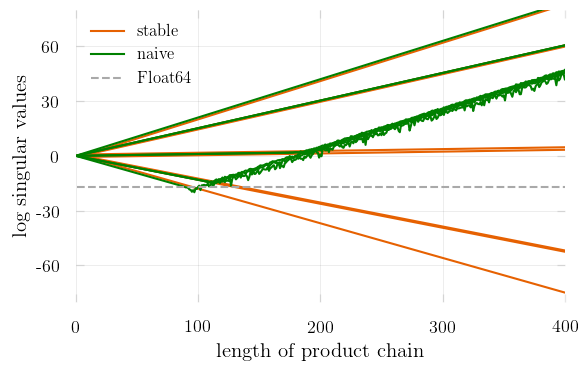

In [19]:
# plot(svs_genericsvd, color="#CA0020", labels = reshape(["exact", "", "","", "","", "", ""], (1,8)))
plot(svs_qr_udt, color="#E66101", labels = reshape(["stable", "", "","", "","", "", ""], (1,8)))
plot!(svs_naive, color=:green, labels = reshape(["naive", "", "","", "","", "", ""], (1,8)))
plot!(1:400, fill(-17, 400), color=:darkgray, linestyle=:dash, label = "Float64")

ylabel!("log singular values")
xlabel!("length of product chain")

ylims!(-80, 80)
xlims!((0., 400.))
savefig("naive_vs_stable.pdf")

In [20]:
using DoubleFloats
Bdb64 = Double64.(B)
svs_naive = StableDQMC.calc_product_chain(Bdb64, N)[2];

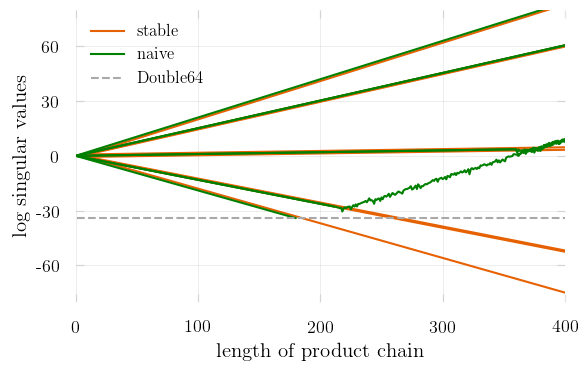

In [21]:
# plot(svs_genericsvd, color="#CA0020", labels = reshape(["exact", "", "","", "","", "", ""], (1,8)))
plot(svs_qr_udt, color="#E66101", labels = reshape(["stable", "", "","", "","", "", ""], (1,8)))
plot!(svs_naive, color=:green, labels = reshape(["naive", "", "","", "","", "", ""], (1,8)))
plot!(1:400, fill(-34, 400), color=:darkgray, linestyle=:dash, label = "Double64")

ylabel!("log singular values")
xlabel!("length of product chain")
ylims!(-80, 80)
xlims!((0., 400.))
savefig("naive_vs_stable_db64.pdf")

In [22]:
# using PyPlot
# plt.style.use("publication_tex")
# function Inf2NaN(x)
#     y = copy(x)
#     y[findall(i -> (i == Inf || i == -Inf), y)] .= NaN
#     y = Float64.(y)
# end

# # PyPlot
# plot(Inf2NaN(svs_genericsvd), color="#CA0020", lw=2, label = "exact")
# plot(svs_qr_udt, color="#E66101", lw=2, label = "QR")
# plot(svs_gesvj, color="#FDB863", lw=2, label = "SVD (Jacobi)")
# plot(svs_gesvd, color="#008837", lw=2, label = "SVD")
# plot(svs_gesdd, color="#5E3C99", lw=2, label = "SVD (D\\&C)")

# handles, labels = gca().get_legend_handles_labels()
# ulabels = unique(labels)
# uhandles = Vector{eltype(handles)}(undef, 0)
# for l in ulabels
#     push!(uhandles, handles[findfirst(isequal(l), labels)])
# end
# legend(uhandles, ulabels, loc="lower left", prop=Dict("size" => 16))

# ylabel("log singular values")
# xlabel("length of product chain")
# ylim(-150, 85)
# xlim(0., 290.)
# savefig("decomp_comparison.pdf")

# Accuracy after inversion (Green's function)

In [206]:
Bbig = BigFloat.(B)
N = 400

setprecision(1000) do
    global U_genericsvd, D_genericsvd, X_genericsvd = StableDQMC.calc_product_chain_stabilized(Bbig, N, genericsvd);
end
U_qr_udt, D_qr_udt, X_qr_udt = StableDQMC.calc_product_chain_stabilized(B, N, decompose_udt);
U_gesvd, D_gesvd, X_gesvd = StableDQMC.calc_product_chain_stabilized(B, N, gesvd);
U_gesdd, D_gesdd, X_gesdd = StableDQMC.calc_product_chain_stabilized(B, N, gesdd);
U_gesvj, D_gesvj, X_gesvj = StableDQMC.calc_product_chain_stabilized(B, N, gesvj);

In [207]:
setprecision(1000) do
    global G_genericsvd = inv(I + U_genericsvd * Diagonal(D_genericsvd) * X_genericsvd)
end

8×8 Array{BigFloat,2}:
  0.379497    0.301777    0.120503   …  -0.0517767   0.120503    0.301777 
  0.301777    0.379497    0.301777      -0.120503   -0.0517767   0.120503 
  0.120503    0.301777    0.379497      -0.0517767  -0.120503   -0.0517767
 -0.0517767   0.120503    0.301777       0.120503   -0.0517767  -0.120503 
 -0.120503   -0.0517767   0.120503       0.301777    0.120503   -0.0517767
 -0.0517767  -0.120503   -0.0517767  …   0.379497    0.301777    0.120503 
  0.120503   -0.0517767  -0.120503       0.301777    0.379497    0.301777 
  0.301777    0.120503   -0.0517767      0.120503    0.301777    0.379497 

In [208]:
A1, A2, A3 = StableDQMC.inv_sum_udts_scalettar(Diagonal(fill(1, 8)), ones(8), Diagonal(fill(1, 8)), U_qr_udt, D_qr_udt, X_qr_udt)
G_qr_udt_scalettar = A1 * Diagonal(A2) * A3

┌ Warning: Calling somewhat inefficient `inv_sum_udts_scalettar`
└ @ Main.StableDQMC C:\Users\carsten\Desktop\sciebo\projects\sdw-qcp\notes\stabilization\StableDQMC\src\qr.jl:379


8×8 Array{Float64,2}:
  0.379497    0.301777    0.120503   …  -0.0517767   0.120503    0.301777 
  0.301777    0.379497    0.301777      -0.120503   -0.0517767   0.120503 
  0.120503    0.301777    0.379497      -0.0517767  -0.120503   -0.0517767
 -0.0517767   0.120503    0.301777       0.120503   -0.0517767  -0.120503 
 -0.120503   -0.0517767   0.120503       0.301777    0.120503   -0.0517767
 -0.0517767  -0.120503   -0.0517767  …   0.379497    0.301777    0.120503 
  0.120503   -0.0517767  -0.120503       0.301777    0.379497    0.301777 
  0.301777    0.120503   -0.0517767      0.120503    0.301777    0.379497 

In [209]:
G_qr_udt = StableDQMC.inv_one_plus_udt(U_qr_udt, D_qr_udt, X_qr_udt)

┌ Warning: Calling somewhat inefficient and potentially inaccurate `inv_one_plus_udt`
└ @ Main.StableDQMC C:\Users\carsten\Desktop\sciebo\projects\sdw-qcp\notes\stabilization\StableDQMC\src\qr.jl:98


8×8 Array{Float64,2}:
  0.379497    0.301777    0.120503   …  -0.0517767   0.120503    0.301777 
  0.301777    0.379497    0.301777      -0.120503   -0.0517767   0.120503 
  0.120503    0.301777    0.379497      -0.0517767  -0.120503   -0.0517767
 -0.0517767   0.120503    0.301777       0.120503   -0.0517767  -0.120503 
 -0.120503   -0.0517767   0.120503       0.301777    0.120503   -0.0517767
 -0.0517767  -0.120503   -0.0517767  …   0.379497    0.301777    0.120503 
  0.120503   -0.0517767  -0.120503       0.301777    0.379497    0.301777 
  0.301777    0.120503   -0.0517767      0.120503    0.301777    0.379497 

In [210]:
isapprox(G_qr_udt, G_qr_udt_scalettar)

true

In [211]:
maximum(G_genericsvd - G_qr_udt)

1.220855392762902722308939007992085611094952298880222650560026069279600317190058e-15

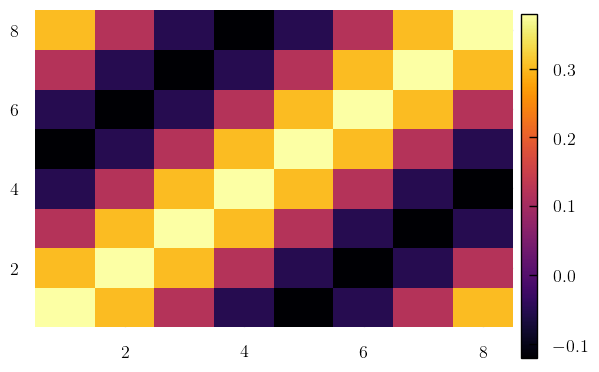

In [212]:
heatmap(Float64.(G_genericsvd))

In [213]:
G_gesdd = StableDQMC.inv_one_plus_udv(U_gesdd, D_gesdd, X_gesdd)

8×8 Array{Float64,2}:
  0.451021     0.236374    0.0988817  …  -0.22308    -0.0315937   0.355839 
  0.377963     0.175918    0.118407      -0.312405   -0.13497     0.284314 
 -0.0392637   -0.188489    0.0792664     -0.0320715   0.116997    0.209358 
 -0.160035    -0.16486     0.0218335      0.270462    0.22255     0.0410832
  0.0805193    0.225867   -0.0205073      0.420694    0.125108   -0.119953 
  0.145267     0.276287   -0.0403982  …   0.513861    0.235912   -0.0456211
  0.00215692  -0.0360371  -0.0259286      0.492672    0.484802    0.218552 
  0.131238    -0.0496303   0.0318702      0.186295    0.371822    0.38402  

In [214]:
G_gesvd = StableDQMC.inv_one_plus_udv(U_gesvd, D_gesvd, X_gesvd)

8×8 Array{Float64,2}:
  0.661022    0.355962    0.0354553  …   0.0378927   0.0418569   0.438202 
  0.253936    0.589308    0.195653       0.0785844  -0.170847   -0.249285 
 -0.259662    0.22294     0.325642      -0.207847   -0.196141   -0.399742 
 -0.181669   -0.195708    0.197521      -0.252995   -0.166764   -0.0292492
  0.0638173  -0.112792   -0.0211023      0.253429   -0.0163484   0.0516044
 -0.0642509   0.0902977  -0.0504068  …   0.614152    0.314547   -0.100328 
 -0.112442   -0.0140131   0.0342186      0.334024    0.548514    0.197514 
  0.344719   -0.0318001   0.0314462     -0.0222423   0.400945    0.666441 

In [215]:
G_gesvj = StableDQMC.inv_one_plus_udv(U_gesvj, D_gesvj, X_gesvj)

8×8 Array{Float64,2}:
  0.379543    0.301818    0.120526   …  -0.051682    0.120557    0.30181  
  0.301921    0.379568    0.301839      -0.120563   -0.0517175   0.120675 
  0.120742    0.301889    0.379594      -0.0519728  -0.120441   -0.0514869
 -0.0515152   0.120634    0.301877       0.120275   -0.0517195  -0.120198 
 -0.120298   -0.0516566   0.120575       0.301632    0.120551   -0.0515593
 -0.0516594  -0.120407   -0.0517424  …   0.379495    0.301819    0.120593 
  0.120545   -0.0517075  -0.120494       0.301902    0.379542    0.301767 
  0.301786    0.120548   -0.0517734      0.120672    0.301827    0.379461 

In [216]:
maximum(G_qr_udt - G_genericsvd)

1.151071312375159158574878578651704293045741262871629307129662843813684415697275e-15

In [217]:
maximum(G_gesvd - G_genericsvd)

0.3253059767165217094265985505230702856562729354948149150778655524366145528073335

In [218]:
maximum(G_gesdd - G_genericsvd)

0.3967908297462604309251968182776578014217512581436635487293650285837533818617783

In [219]:
maximum(G_gesvj - G_genericsvd)

0.0003057168839085998247442334300451058127810773117875606328479876837643917682763925

# Accuracy of determinant

In [199]:
function det_G_udt(U,D,T)
  m = U' / T
  m[diagind(m)] .+= D
  u,d,t = decompose_udt(m)
  prod(1 ./ d)
end

function det_G_udv(U,D,Vd)
  inner = copy(Vd')
  inner .+= U * Diagonal(D)
  I = decompose_udv!(inner)
  prod(1 ./ I[2])
end

function det_G_udv(U::Matrix{BigFloat},D,Vd::Matrix{BigFloat})
  inner = copy(Vd')
  inner .+= U * Diagonal(D)
  I = StableDQMC.genericsvd!(inner)
  prod(1 ./ I[2])
end

det_G_udv (generic function with 2 methods)

In [200]:
absdiff(x,y) = abs(x-y)
reldiff(x, y) = abs((x - y) / (x + y))

reldiff (generic function with 1 method)

In [201]:
det_exact = det_G_udv(U_genericsvd, D_genericsvd, X_genericsvd)

2.630118238444622661457780233544656505561086406155188818152859629951458589435972e-93

In [202]:
det_qr = det_G_udt(U_qr_udt, D_qr_udt, X_qr_udt)
@show reldiff(det_qr, det_exact)
@show absdiff(det_qr, det_exact);

reldiff(det_qr, det_exact) = 7.717768457082768086361806843999433775948640133501785838857381049512657666039471e-15
absdiff(det_qr, det_exact) = 4.059728715813232006319745964008484328690180933520604636258830552095605619190656e-107


In [203]:
det_gesvd = det_G_udv(U_gesvd, D_gesvd, X_gesvd)
@show reldiff(det_gesvd, det_exact)
@show absdiff(det_gesvd, det_exact);

reldiff(det_gesvd, det_exact) = 0.9988205065935393572155413585960368813939856094033951939030727438228707526677088
absdiff(det_gesvd, det_exact) = 4.454481927469466275504561135011529575926571662695620966199676858034746440745254e-90


In [204]:
det_gesdd = det_G_udv(U_gesdd, D_gesdd, X_gesdd)
@show reldiff(det_gesdd, det_exact)
@show absdiff(det_gesdd, det_exact);

reldiff(det_gesdd, det_exact) = 0.9999998463560348513793781639933897015324211464703728555293365981845207337852585
absdiff(det_gesdd, det_exact) = 2.630118036393709657337528939986035911974885171624061344519124070310812759161605e-93


In [205]:
det_gesvj = det_G_udv(U_gesvj, D_gesvj, X_gesvj)
@show reldiff(det_gesvj, det_exact)
@show absdiff(det_gesvj, det_exact);

reldiff(det_gesvj, det_exact) = 0.0001676936954094292256411095037919145680865777776830883297897275203526151130472
absdiff(det_gesvj, det_exact) = 8.822564423801557058600718245381617836508752952373271793875765314353300400401188e-97
